### Feature Impacts on Noisy Data
We will generate data points randomly for both training and test sets, and see if our feature tracking methods can help in a model's training phase when data is extremely noisy.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from helper_plots import plot_feature_importances_per_iter, plot_feature_impacts_per_iter, plot_total_feature_impacts, plot_prediction_feature_impacts

C:\Users\cf660\AppData\Local\Temp\ipykernel_14472\3152192989.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
np.random.seed(42)
n_samples = 1000

# Generate datasets from a normal distribution
X = np.random.randn(n_samples, 20)
y = np.random.randn(n_samples)

df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(20)])
feature_name_mappings = {i: f'feature_{i+1}' for i in range(20)}
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0.348286
1,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,...,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.283324
2,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,...,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,-0.936520
3,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,1.538037,-0.035826,1.564644,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,0.579584
4,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,...,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,-1.490083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.121244,-0.554667,-1.852343,0.247086,0.530490,-1.574868,-1.233694,0.252330,0.339142,-0.990647,...,-1.836489,1.377264,-1.299874,0.542259,-0.034961,1.289594,-0.792254,0.061253,-1.698427,-0.440792
996,-1.938527,0.596334,-1.785026,-0.228218,1.011295,0.746685,-0.664585,-1.588503,0.509495,1.342257,...,-0.803313,-0.524902,0.571609,1.228518,-1.239607,-1.498282,2.339996,-0.177323,0.252893,1.460557
997,-0.691931,0.489962,0.960061,0.299796,1.740858,-0.326745,-0.262882,0.231406,0.464962,0.227947,...,0.312515,-0.374174,-0.580977,0.032482,-0.961523,-1.135391,-2.615469,1.747237,0.555731,1.161909
998,-0.116764,-0.667223,-2.876032,-0.728529,0.715866,0.942174,0.642292,0.158392,1.303874,-0.328537,...,-0.384582,-0.881141,-1.005713,-1.064496,0.659068,-0.742746,-1.033029,0.713735,0.327970,0.208457


In [3]:
from feature_tracker import CustomGBR
# Train CustomGBR with early stopping
gbr = CustomGBR(n_estimators=500, learning_rate=0.1, max_depth=3, validation_fraction=0.2, n_iter_no_change=10, tol=0.001, random_state=42)
gbr.fit(X_train, y_train)
print(f'gbr fit with {gbr.n_estimators_} from early stopping')

CustomGBR(n_estimators=500, n_iter_no_change=10, random_state=42, tol=0.001,
          validation_fraction=0.2)

#### Comparing feature tracking vs traditional early stopping methods

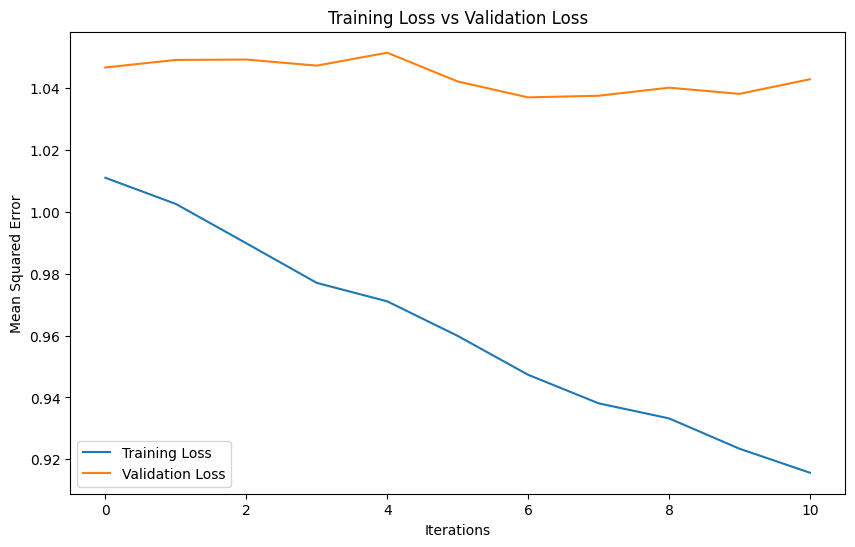

In [4]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_train = [mean_squared_error(y_train, y_pred) for y_pred in gbr.staged_predict(X_train)]
mse_test = [mean_squared_error(y_test, y_pred) for y_pred in gbr.staged_predict(X_test)]

# Plotting the training loss vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(mse_train, label='Training Loss')
plt.plot(mse_test, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

#### Normal Feature Importances

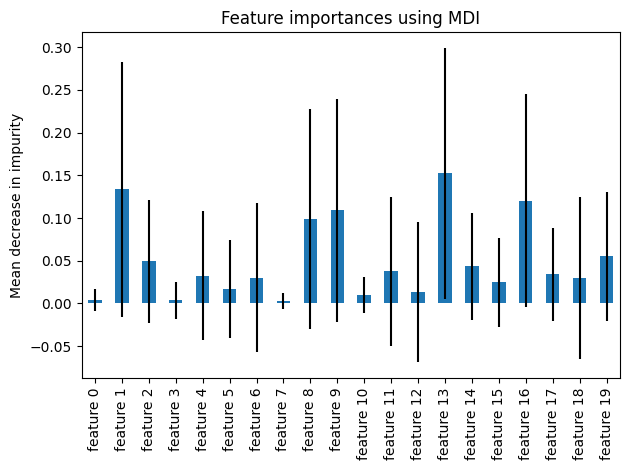

In [5]:
importances = gbr.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in gbr.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
gbr_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
gbr_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [6]:
from sklearn.inspection import permutation_importance
r = permutation_importance(gbr, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > -1:
        print(f"{feature_name_mappings[i]:<8} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

feature_20 0.013 +/- 0.007
feature_17 0.012 +/- 0.008
feature_3 0.008 +/- 0.004
feature_14 0.006 +/- 0.008
feature_15 0.005 +/- 0.003
feature_5 0.003 +/- 0.004
feature_16 0.003 +/- 0.002
feature_18 0.002 +/- 0.003
feature_12 0.002 +/- 0.002
feature_6 0.001 +/- 0.003
feature_7 0.001 +/- 0.003
feature_19 0.001 +/- 0.001
feature_8 0.001 +/- 0.001
feature_4 0.001 +/- 0.001
feature_11 0.000 +/- 0.000
feature_1 0.000 +/- 0.000
feature_13 0.000 +/- 0.000
feature_9 -0.002 +/- 0.005
feature_2 -0.008 +/- 0.004
feature_10 -0.013 +/- 0.009


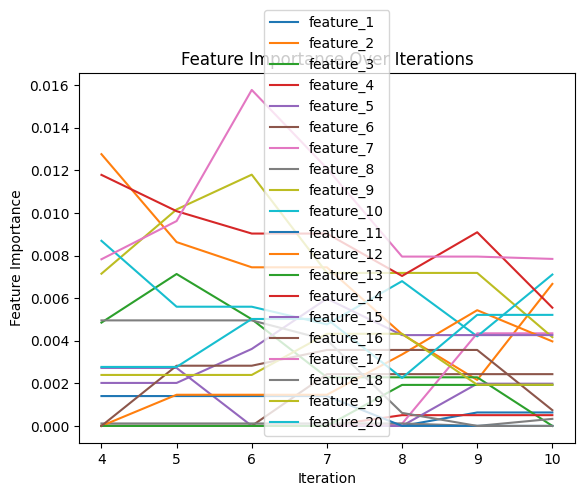

In [7]:
feature_importances_per_iter = gbr.get_feature_importance_per_iteration()
plot_feature_importances_per_iter(feature_importances_per_iter, feature_name_mappings)

As we can see, in the presence of extremely noisy data, some stronger feature influences are unable to be picked up by feature importance. <br>
This is because all features barely improve MSE.

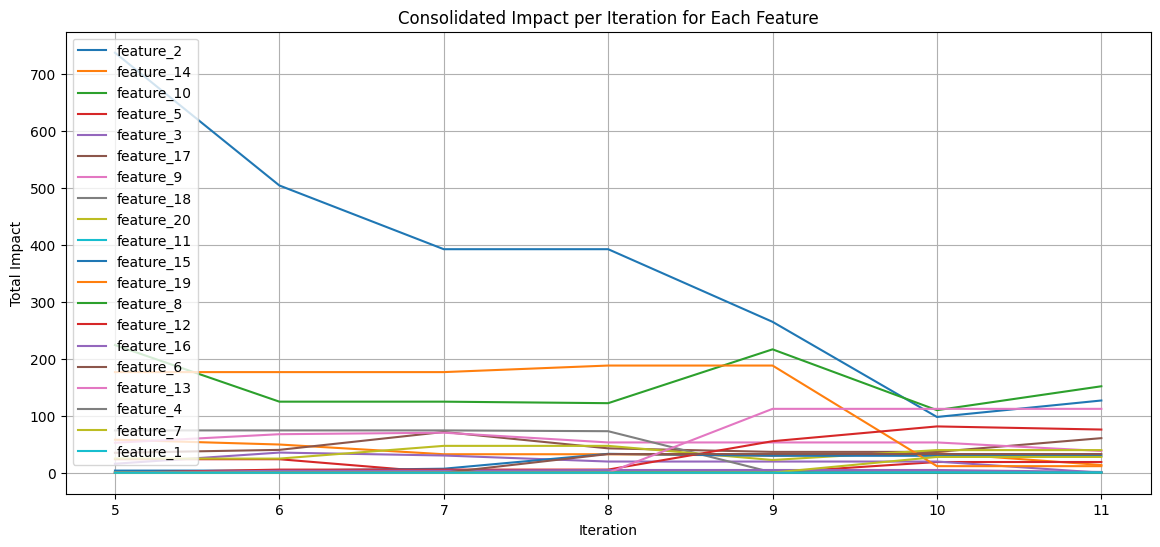

In [8]:
feature_impacts_per_iter = gbr.get_feature_impacts_per_iteration()
plot_feature_impacts_per_iter(feature_impacts_per_iter, weighted_by_samples=True, feature_name_mappings=feature_name_mappings)

Contrary to feature importances, it is clear that feature 2 has the greatest impact on the predictions of the eventual gradient boosting regressor ensemble.

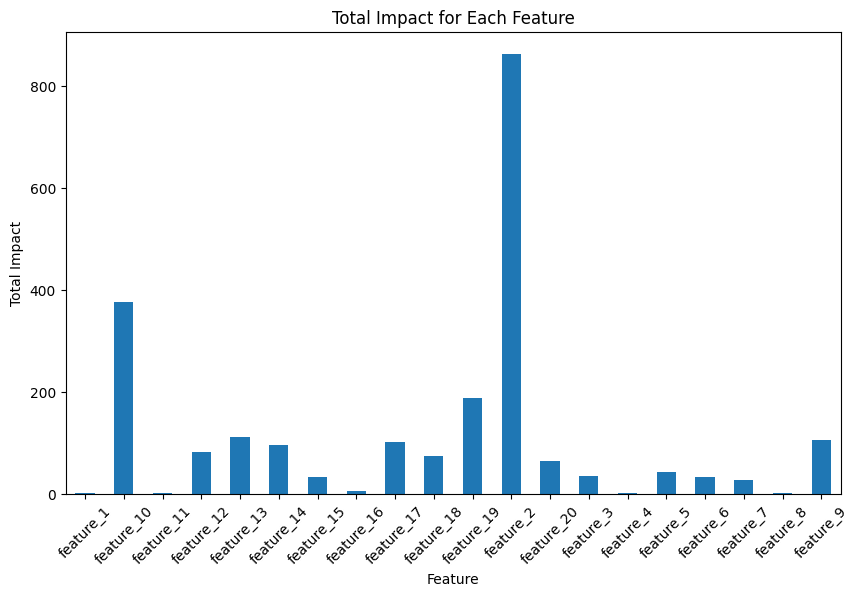

In [9]:
plot_total_feature_impacts(feature_impacts_per_iter, weighted_by_samples=True, feature_name_mappings=feature_name_mappings)

#### Compare Prediction Feature Impact with TreeExplainer SHAP values and LIME

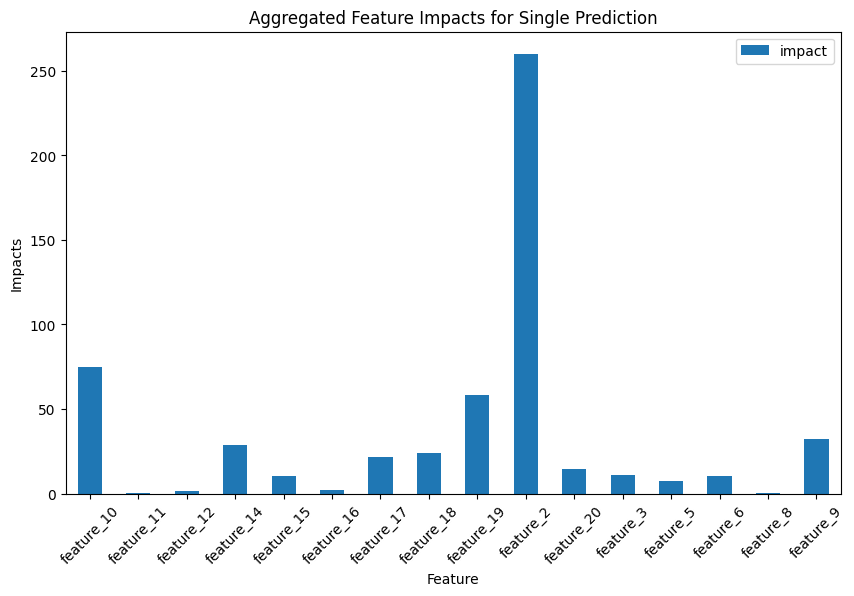

In [17]:
prediction_feature_impacts = gbr.get_predictions_feature_impacts(X_test)
plot_prediction_feature_impacts(prediction_feature_impacts, feature_name_mappings=feature_name_mappings)

c:\Users\cf660\Desktop\fyp\code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


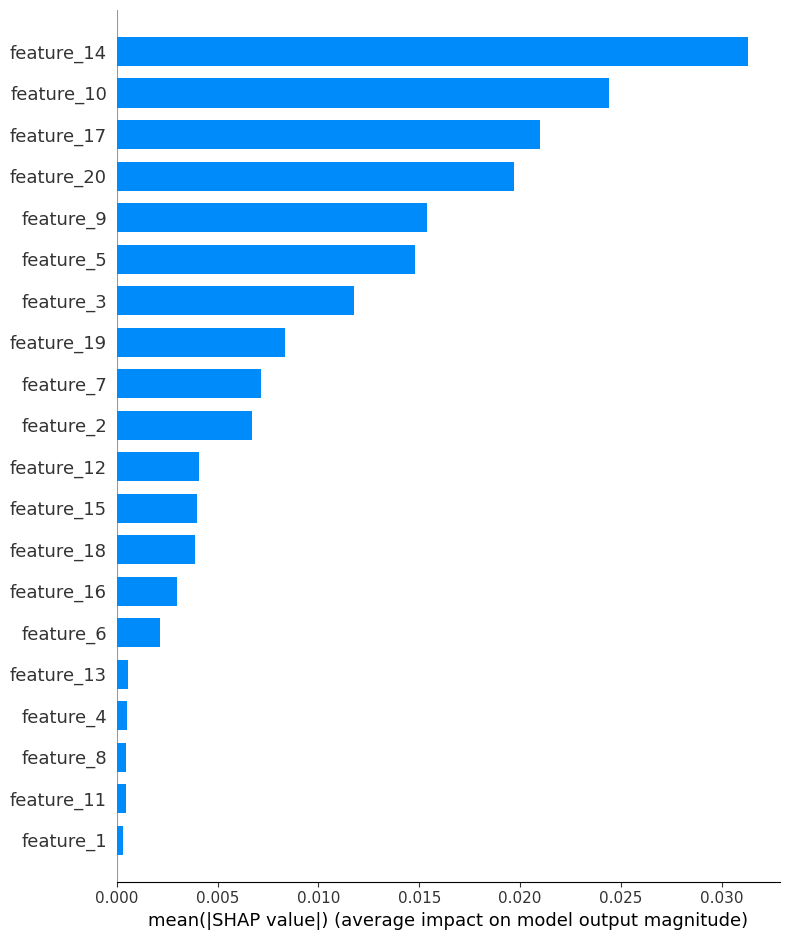

In [11]:
import shap
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [12]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                              feature_names=X_train.columns.tolist(),
                                              class_names=['target'],
                                              mode='regression')

# Explain an individual prediction from the test set
i = 0  # Index of the prediction to explain
exp = explainer.explain_instance(X_test.iloc[i], gbr.predict, num_features=15)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

c:\Users\cf660\Desktop\fyp\code\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\cf660\Desktop\fyp\code\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\cf660\Desktop\fyp\code\.venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1.04
Mean Absolute Error (MAE): 0.83


In [14]:
# Train CustomGBR with stopping decided by feature tracking
gbr = CustomGBR(n_estimators=8, learning_rate=0.1, max_depth=3, validation_fraction=0.2, n_iter_no_change=10, tol=0.001, random_state=42)
gbr.fit(X_train, y_train)


CustomGBR(n_estimators=8, n_iter_no_change=10, random_state=42, tol=0.001,
          validation_fraction=0.2)

In [15]:
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1.04
Mean Absolute Error (MAE): 0.82
